In [1]:
%pylab inline

import zap_util as z

import statsmodels.api as sm
import statsmodels.formula.api as smf
rmse = {}
z.set_style()

Populating the interactive namespace from numpy and matplotlib


In [10]:
df = z.get_imoveis_dataframe(False)


In [44]:
df2 = df[df.bairro_g == 'Tijuca']
var_ignore = ['bairro_g']
f,_,e = z.prep_formula(df2,'df2', cat=['suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: id_bairro_g,bairro_g,preco,m2


Fórmula: df2.preco  ~ df2.dm_esquina + C(df2.quartos) + df2.dm_closet + df2.dist_saude_privada + df2.dm_armario + df2.se_anos_estudo + df2.dm_recuado + df2.dm_fundos + df2.dm_andar_alto + df2.dm_mezanino + df2.dm_piscina + df2.dm_playground + df2.dist_centro_lng + df2.dm_hidrometro + df2.lng + df2.dm_seguranca + df2.dist_trem + df2.dist_lagoa + C(df2.suites) + df2.dm_sol_da_manha + df2.area + df2.dm_frente + df2.dist_delegacia + df2.dist_centro_lat + df2.dm_blindex + df2.dist_favela + df2.dist_logradouro + df2.dm_terraco + df2.dm_salao_de_jogos + df2.se_idh + df2.dist_centro + df2.dm_sala_de_jantar + df2.dm_dependencia + df2.se_crm_violento + df2.dm_estacionamento_visitantes + df2.dm_banheira + df2.dist_saude_publica + df2.dist_bombeiro + df2.dm_jardim + C(df2.garagem) + df2.dist_praia + df2.dm_duplex + df2.dm_andar_inteiro + df2.dm_sol_da_tarde + df2.condominio + df2.lat + df2.dm_varanda + df2.dm_triplex + df2.dm_children_care + df2

In [45]:
lm = sm.formula.ols(f, df2).fit()
rmse['default'] = z.rmse(lm.resid)
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:              df2.preco   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     174.4
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        18:05:34   Log-Likelihood:                -26278.
No. Observations:                4019   AIC:                         5.269e+04
Df Residuals:                    3952   BIC:                         5.311e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercep

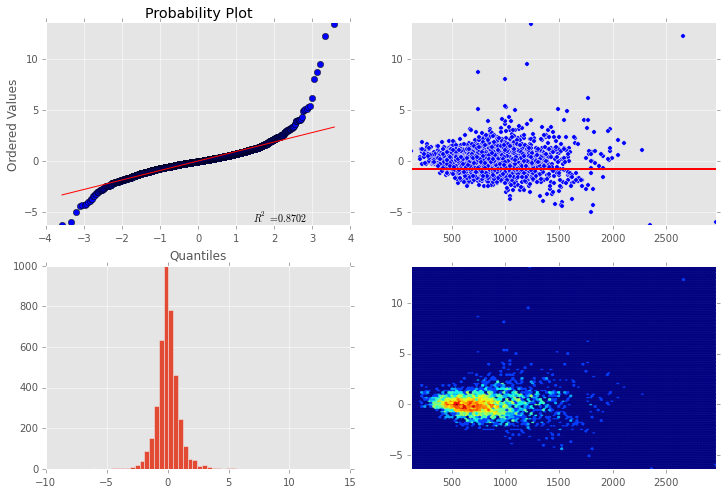

In [46]:
z.plot_residual(lm)

In [47]:
z.print_autocorr(df,['id_bairro_g'])

Coluna               | Autocorrelacionada com                            
se_anos_estudo       : ['se_idh(0.95)', 'se_renda(0.87)', 'se_perc_alfabetizacao(0.89)']
dm_frente            : ['dm_varanda(0.70)', 'dm_salao_de_festas(0.73)']  
dist_delegacia       : ['dist_centro(0.82)', 'dist_metro(0.87)']         
dist_centro_lng      : ['lng(-1.00)', 'dist_delegacia(0.79)', 'dist_centro(0.97)', 'se_saneamento(-0.80)', 'dist_metro(0.92)']
preco                : ['area(0.71)', 'm2(0.71)']                        
se_saneamento        : ['dist_metro(-0.79)']                             
lng                  : ['dist_delegacia(-0.79)', 'dist_centro(-0.97)', 'se_saneamento(0.80)', 'dist_metro(-0.92)']
dist_centro          : ['se_saneamento(-0.79)', 'dist_metro(0.96)']      
se_idh               : ['se_renda(0.77)', 'se_perc_alfabetizacao(0.89)'] 
dist_trem            : ['dist_delegacia(0.74)', 'dist_centro_lat(0.91)', 'dist_centro(0.71)', 'lat(-0.80)', 'dist_metro(0.79)']
dist_lagoa           : 

In [48]:
var_ignore += ['id_bairro_g', 'se_anos_estudo','dm_piscina', 'dist_lagoa', 
    'dm_frente','dist_centro_lat','dist_centro_lng','dist_delegacia',
    'se_idh','preco','m2','dist_metro','dist_trem','dist_centro',
    'se_saneamento',]
z.print_autocorr(df, var_ignore)

Não há colunas autocorrelacionadas.


In [49]:
f,_,e = z.prep_formula(df2,'df2', cat=['suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: se_anos_estudo,preco,dm_piscina,bairro_g,dist_centro_lat,dist_trem,dist_lagoa,dm_frente,dist_delegacia,dist_centro_lng,m2,id_bairro_g,se_saneamento,se_idh,dist_centro,dist_metro


Fórmula: df2.preco  ~ df2.dm_esquina + C(df2.quartos) + df2.dm_closet + C(df2.suites) + df2.dm_armario + df2.se_crm_violento + df2.dm_recuado + df2.dm_fundos + df2.dm_andar_alto + df2.dm_mezanino + df2.dm_playground + df2.dm_hidrometro + df2.lng + df2.dm_seguranca + df2.se_renda + df2.dm_sol_da_manha + df2.area + df2.dist_saude_privada + df2.dm_linear + df2.dm_blindex + df2.dist_favela + df2.dist_logradouro + df2.dm_terraco + df2.dm_salao_de_jogos + df2.dm_andar_inteiro + df2.dm_sala_de_jantar + df2.dm_dependencia + df2.dm_estacionamento_visitantes + df2.dm_banheira + df2.dist_saude_publica + df2.dist_bombeiro + df2.dm_jardim + C(df2.garagem) + df2.dist_praia + df2.dm_duplex + df2.dm_sol_da_tarde + df2.condominio + df2.lat + df2.dm_varanda + df2.dm_triplex + df2.dm_children_care + df2.dm_

In [50]:
lm = sm.formula.ols(f, df2).fit()
rmse['w_autocorr'] = z.rmse(lm.resid)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              df2.preco   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        18:05:36   Log-Likelihood:                -26381.
No. Observations:                4019   AIC:                         5.288e+04
Df Residuals:                    3960   BIC:                         5.325e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercep

In [51]:
# Lista de parâmetros sem significância.
plow = lm.pvalues.copy()
#bp.index = [i.replace('C(df.bairro_g)[T.', '').replace(']','')  for i in bp.index.tolist()]
c = plow > 0.05
plow = plow[c]
plow

Intercept                           0.275254
df2.dm_closet                       0.052929
df2.dm_armario                      0.110590
df2.se_crm_violento                 0.275254
df2.dm_recuado                      0.367088
df2.dm_andar_alto                   0.771659
df2.dm_mezanino                     0.624126
df2.dm_playground                   0.785614
df2.dm_hidrometro                   0.574005
df2.dm_seguranca                    0.577683
df2.se_renda                        0.275254
df2.dm_sol_da_manha                 0.577071
df2.dm_linear                       0.275254
df2.dm_blindex                      0.630464
df2.dm_salao_de_jogos               0.924781
df2.dm_andar_inteiro                0.389991
df2.dm_sala_de_jantar               0.124005
df2.dm_dependencia                  0.523820
df2.dm_estacionamento_visitantes    0.386009
df2.dm_banheira                     0.788334
df2.dist_saude_publica              0.816080
df2.dist_praia                      0.166573
df2.dm_dup

In [52]:
# Remover parâmetros sem significância.
var_ignore_too = map(lambda x: x.replace('df2.',''), plow.index.tolist())
var_ignore += var_ignore_too 

In [53]:
z.print_autocorr(df, var_ignore)

Não há colunas autocorrelacionadas.


In [54]:
f,_,e = z.prep_formula(df2,'df2', cat=['suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: dm_closet,dm_sala_de_jantar,dm_armario,se_anos_estudo,dm_recuado,dm_sol_da_tarde,dm_andar_alto,dm_mezanino,preco,dm_piscina,dm_playground,dm_hidrometro,dm_seguranca,dist_trem,dist_lagoa,dm_frente,dist_delegacia,dist_centro_lat,dm_blindex,Intercept,m2,id_bairro_g,bairro_g,se_idh,dm_children_care,dm_churrasqueira,dm_dependencia,se_crm_violento,dm_estacionamento_visitantes,dm_banheira,dist_saude_publica,dm_andar_inteiro,dm_salao_de_jogos,dist_praia,dm_duplex,se_renda,lat,dm_varanda,dm_triplex,se_crm_roubo,dm_quarto_de_empregada,dist_centro,dm_lateral_,dm_portaria,dm_indevassavel,dm_cobertura,dist_centro_lng,dm_quadra,dm_elevador_privativo,dm_sauna,se_perc_alfabetizacao,se_saneamento,dm_andar_baixo,dist_metro,dm_sol_da_manha,dm_linear


Fórmula: df2.preco  ~ C(df2.suites) + C(df2.quartos) + df2.area + df2.dm_salao_de_festas + df2.dist_saude_privada + df2.dm_copa + df2.dist_bombeiro + df2.dm_fundos + C(df2.garagem) + df2.dist_favela + df2.dist_logradouro + df2.dm_jardim

In [55]:
lm = sm.formula.ols(f, df2).fit()
rmse['w_unsignif_1'] = z.rmse(lm.resid)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              df2.preco   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     445.3
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        18:05:36   Log-Likelihood:                -26403.
No. Observations:                4019   AIC:                         5.286e+04
Df Residuals:                    3994   BIC:                         5.301e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept               1.09

In [56]:
# Lista de parâmetros sem significância.
plow = lm.pvalues.copy()
c = plow > 0.05
plow = plow[c]
plow

df2.dist_saude_privada    0.076062
df2.dm_jardim             0.144039
df2.dm_terraco            0.149759
dtype: float64

In [57]:
# Remover parâmetros sem significância.

# Encontrar variáveis que não são bairros.
var_ignore_too = map(lambda x: x.replace('df.',''), plow.index.tolist())
var_ignore_too = var_ignore_too[1:]
var_ignore += var_ignore_too

In [58]:
f,_,e = z.prep_formula(df2,'df2', cat=['bairro_g','suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: dm_closet,dm_sala_de_jantar,dm_armario,se_anos_estudo,dm_recuado,dm_sol_da_tarde,dm_andar_alto,dm_mezanino,preco,dm_piscina,dm_playground,dm_hidrometro,dm_seguranca,dist_trem,dist_lagoa,dm_frente,dist_delegacia,dist_centro_lat,dm_blindex,Intercept,m2,id_bairro_g,bairro_g,se_idh,dm_children_care,dm_churrasqueira,dm_dependencia,se_crm_violento,dm_estacionamento_visitantes,dm_banheira,dist_saude_publica,df2.dm_jardim,dm_andar_inteiro,dm_salao_de_jogos,dist_praia,dm_duplex,se_renda,lat,dm_varanda,dm_triplex,se_crm_roubo,dm_quarto_de_empregada,dist_centro,dm_lateral_,dm_portaria,dm_indevassavel,dm_cobertura,dist_centro_lng,dm_quadra,dm_elevador_privativo,dm_sauna,se_perc_alfabetizacao,se_saneamento,dm_andar_baixo,dist_metro,df2.dm_terraco,dm_sol_da_manha,dm_linear


Fórmula: df2.preco  ~ C(df2.suites) + C(df2.quartos) + df2.area + df2.dm_salao_de_festas + df2.dist_saude_privada + df2.dm_copa + df2.dist_bombeiro + df2.dm_fundos + C(df2.garagem) + df2.dist_favela + df2.di

In [59]:
lm = sm.formula.ols(f, df2).fit()
rmse['w_unsignif_2'] = z.rmse(lm.resid)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              df2.preco   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     445.3
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        18:05:36   Log-Likelihood:                -26403.
No. Observations:                4019   AIC:                         5.286e+04
Df Residuals:                    3994   BIC:                         5.301e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept               1.09

# Determinar se a Regresssão média simples é o melhor método.

In [60]:
modelo_rl = z.rmse(lm.resid)
modelo_media = z.rmse(df2.preco-df2.preco.mean())
if modelo_rl < modelo_media :
    print 'REGRESSAO WINS por {:.2f}%'.format((1-modelo_rl/modelo_media)*100)
else:
    print 'MEDIA WINS por {:.2f}%'.format((1-modelo_media/modelo_ml)*100)

REGRESSAO WINS por 47.84%


In [61]:
 modelo_rl , modelo_media

(172.54256742391752, 330.8061423397312)

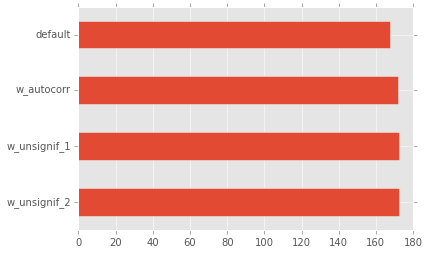

In [62]:
srmse = z.pd.Series(data=rmse.values(),index=rmse.keys())
srmse.sort(ascending=False)
srmse.plot(kind='barh');